<a href="https://colab.research.google.com/github/VishnuPy/MyPython/blob/master/WeightConstraint_NN_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

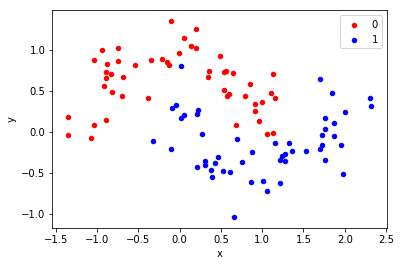

In [0]:
#generate two moon datasets

from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [0]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [0]:
# define model
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
#fit model
history = model.fit(trainX, trainy, validation_data=(testX,testy), epochs=4000, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [0]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


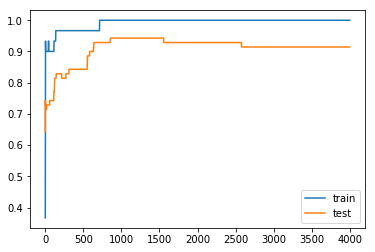

In [0]:
# plot history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Weight Constraint Addition to remove Overfitting

Train: 1.000, Test: 0.943


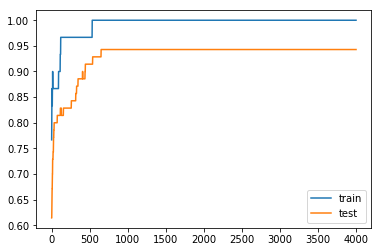

In [0]:
# define model
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.constraints import unit_norm, min_max_norm, max_norm

model = Sequential()
#model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=unit_norm())
#model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=min_max_norm(min_value=1.0, max_value=1.0)))
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=min_max_norm(min_value=0.6, max_value=1.0)))
#model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=max_norm(1))) #no improvement
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit model
history = model.fit(trainX, trainy, validation_data=(testX,testy), epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()